# Projeto 5 - Analise de Sentimentos 

* #### Descrição do projeto:
A partir da database de reviews sobre produtos da Alexa (Amazon), descobrir insights e aplcar analise de sentimento nos textos e assim determinar se são reviews positivos ou negativos
---
Fonte: www.kaggle.com/sid321axn/amazon-alexa-reviews



---
* #### Importação das bibliotecas 

In [73]:
import pandas as pd 
import matplotlib.pyplot as plt 
import tensorflow as tf
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import numpy as np
import seaborn as sb
tf.__version__

'2.1.0'

---
---
* ### Importação do dataset 

In [52]:
# Como temos um dataset como uma arquivo .tsv temos
dataset = pd.read_csv(r"C:\Users\gusta\Desktop\5°Projeto - Analise de Sentimentos\original.tsv", sep = '\t')
dataset.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


A coluna feedback nos informa se o review foi positivo (1) ou negativo (0)

---
---
* ### Pré Processamento do dataset

#### Divisão dos reviews positivos e negativos 

In [53]:
positivos = dataset[dataset['feedback']==1]
positivos

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [54]:
negativos = dataset[dataset['feedback']==0]
negativos

,rating,date,variation,verified_reviews,feedback
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0
...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0
3091,1,30-Jul-18,Black Dot,I didn’t order it,0


Comparando a quantidade de reviews de cada classe 

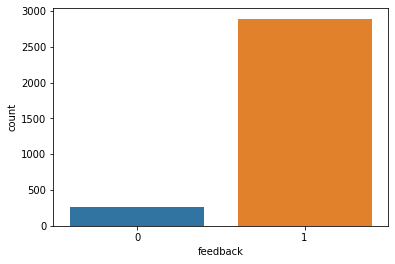

In [55]:
sb.countplot(dataset['feedback'],label = 'Count')

É possiel verificar que a database está desbalanceada em relação as classes o que pode prejudicar o resultado de classifcação do nosso modelo 

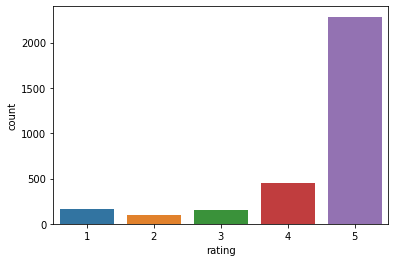

In [56]:
sb.countplot(dataset['rating'],data = dataset)

---

#### Para a criação do modelo apenas as colunas verified_reviews, feedback e variation serão utilizadas

In [57]:
dataset = dataset.drop(['date','rating'],axis=1)
dataset.head()

,variation,verified_reviews,feedback
0,Charcoal Fabric,Love my Echo!,1
1,Charcoal Fabric,Loved it!,1
2,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,Charcoal Fabric,Music,1


Transformação da coluna variation para variaveis dummy direto com a biblioteca pandas sem a necessidade de fazer com o One  Hot Encoder

In [58]:
variationDummies = pd.get_dummies(dataset['variation'])
variationDummies

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [59]:
dataset.drop(['variation'],axis=1,inplace = True)
dataset.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


In [60]:
datasetFinal = pd.concat([dataset,variationDummies],axis=1)
datasetFinal

,verified_reviews,feedback,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,Walnut Finish,White,White Dot,White Plus,White Show,White Spot
0,Love my Echo!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,Loved it!,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,"Sometimes while playing a game, you can answer...",1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,I have had a lot of fun with this thing. My 4 ...,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,Music,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,"Perfect for kids, adults and everyone in betwe...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3146,"Listening to music, searching locations, check...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3147,"I do love these things, i have them running my...",1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3148,Only complaint I have is that the sound qualit...,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


* ### Tokenização 

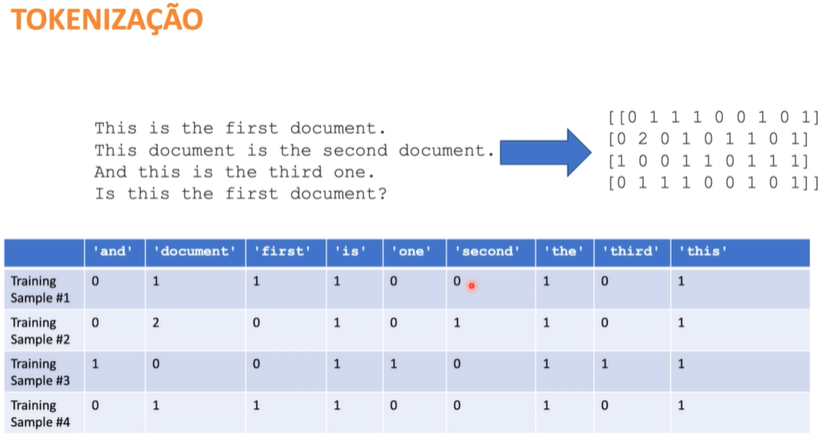

In [61]:
from IPython.display import Image
Image(r"C:\Users\gusta\Desktop\5°Projeto - Analise de Sentimentos\Capturar.png")

Acima temos um exemplo auto explicativo de como ocorre o processo de tokenização, para uso de frases em redes neurais 

In [62]:
# Inicio da tokenização
vectorizer = CountVectorizer()
datasetVectorizer = vectorizer.fit_transform(datasetFinal['verified_reviews'])

In [63]:
#Vizualizando os dados da tokenização
# Todas as palavras distintas
print(vectorizer.get_feature_names())

['00', '000', '07', '10', '100', '100x', '11', '1100sf', '12', '129', '12am', '15', '150', '18', '19', '1964', '1990', '1gb', '1rst', '1st', '20', '200', '2000', '2017', '229', '23', '24', '25', '29', '2nd', '2package', '30', '300', '30pm', '34', '360', '39', '3rd', '3x', '3xs', '40', '45', '48', '4am', '4ghz', '4k', '4th', '50', '54', '5am', '5ghz', '5th', '600', '62', '672', '6th', '70', '75', '79', '80', '80s', '81', '83', '85', '88', '888', '8gb', '90', '91', '911', '99', '_specifically_', 'a1', 'a19', 'abay', 'abc', 'abd', 'abilities', 'ability', 'able', 'abode', 'about', 'above', 'absolutely', 'absolutly', 'ac', 'accent', 'acceptable', 'accepting', 'access', 'accessable', 'accessible', 'accessing', 'accessories', 'accesss', 'accident', 'accidentally', 'accompanying', 'accomplish', 'accomplished', 'according', 'accordingly', 'account', 'accounts', 'accuracy', 'accurate', 'accurately', 'accustom', 'acknowledge', 'acoustical', 'across', 'act', 'acting', 'action', 'actions', 'activat

In [64]:
# Visualizando a matriz tokenizada
print(datasetVectorizer.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [65]:
datasetFinal.drop(['verified_reviews'],axis=1,inplace=True)

In [66]:
# Passando a matriz para um dataframe para podermos juntar com o dataframe final 
reviews = pd.DataFrame(datasetVectorizer.toarray())
reviews.head()

,0,1,2,3,4,5,6,7,8,9,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
datasetFinal =  pd.concat([datasetFinal,reviews],axis=1)
feedback = dataset['feedback']
datasetFinal.drop(['feedback'],axis=1,inplace = True)
datasetFinal.head()

,Black,Black Dot,Black Plus,Black Show,Black Spot,Charcoal Fabric,Configuration: Fire TV Stick,Heather Gray Fabric,Oak Finish,Sandstone Fabric,...,4034,4035,4036,4037,4038,4039,4040,4041,4042,4043
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [68]:
feedback

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

#### Divisão em base de teste e treinamento 

In [69]:
Xtreino,Xteste,Ytreino,Yteste = train_test_split(datasetFinal,feedback,test_size = 0.2, random_state = 5)
Xtreino.shape

(2520, 4060)

---
---
* #### Construção do Modelo 

In [71]:
model = tf.keras.models.Sequential()
#Camada de entrada
model.add(tf.keras.layers.Dense(units=400,activation='relu',input_shape=(4060,)))
#Camadas ocultas
model.add(tf.keras.layers.Dense(units=400,activation='relu'))
#Camada de saida
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 400)               1624400   
_________________________________________________________________
dense_4 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 401       
Total params: 1,785,201
Trainable params: 1,785,201
Non-trainable params: 0
_________________________________________________________________


Como estamos agora trabalhando com um modelo de classificação como erro iremos usar o binary_crossentropy  para ver o erro de classificação com duas classes existentes, classificação 1 ou 0 

In [72]:
model.compile(optimizer='Adam',loss = 'binary_crossentropy',metrics = ['accuracy'])
treinamento = model.fit(Xtreino,Ytreino,epochs = 10)

Train on 2520 samples
Epoch 1/10
2520/2520 [==============================] - 2s 603us/sample - loss: 0.2683 - accuracy: 0.9190
Epoch 2/10
2520/2520 [==============================] - 1s 370us/sample - loss: 0.0839 - accuracy: 0.9651
Epoch 3/10
2520/2520 [==============================] - 1s 520us/sample - loss: 0.0318 - accuracy: 0.9905
Epoch 4/10
2520/2520 [==============================] - 1s 486us/sample - loss: 0.0186 - accuracy: 0.9944
Epoch 5/10
2520/2520 [==============================] - 1s 550us/sample - loss: 0.0170 - accuracy: 0.9933
Epoch 6/10
2520/2520 [==============================] - 1s 592us/sample - loss: 0.0169 - accuracy: 0.9948
Epoch 7/10
2520/2520 [==============================] - 2s 643us/sample - loss: 0.0156 - accuracy: 0.9937
Epoch 8/10
2520/2520 [==============================] - 1s 514us/sample - loss: 0.0163 - accuracy: 0.9944
Epoch 9/10
2520/2520 [==============================] - 1s 563us/sample - loss: 0.0143 - accuracy: 0.9944
Epoch 10/10
2520/2520 [=

---
---
* #### Avaliação do Modelo

In [74]:
yPredictTreino = model.predict(Xtreino)
yPredictTreino

array([[1.        ],
       [0.9999989 ],
       [1.        ],
       ...,
       [1.        ],
       [0.99967504],
       [0.9999951 ]], dtype=float32)

Vamos definir um treshold, ou seja um valor de limite para transformação dessas propabiblidades sigmoidais em zeros e 1 que são as classes que definimos anteriormente 

In [75]:
yPredictTreino = (yPredictTreino>0.5)
yPredictTreino


array([[ True],
       [ True],
       [ True],
       ...,
       [ True],
       [ True],
       [ True]])

In [77]:
matrix = confusion_matrix(Ytreino,yPredictTreino)
matrix

array([[ 189,    9],
       [   5, 2317]], dtype=int64)

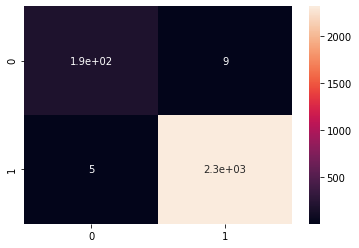

In [78]:
sb.heatmap(matrix,annot= True)

Podemos observar que o modelo teve apenas 14 erros perante a toda base de treinamento usada 

In [80]:
print("Precisão da Classe Positiva = ", (189/(189+9))*100,"%")
print("Precisão da Classe Negativa = ", (2317/(2317+5))*100,"%")

Precisão da Classe Positiva =  95.45454545454545 %
Precisão da Classe Negativa =  99.78466838931955 %


#### Verificando a precisão do modelo com o dataset de teste 

In [82]:
previsoesTeste = model.predict(Xteste)
previsoesTeste = (previsoesTeste>0.5)
matrixTeste = confusion_matrix(Yteste,previsoesTeste)
matrixTeste

array([[ 23,  36],
       [  6, 565]], dtype=int64)

In [83]:
print("Precisão da Classe Positiva = ", (23/(23+36))*100,"%")
print("Precisão da Classe Negativa = ", (565/(565+6))*100,"%")

Precisão da Classe Positiva =  38.983050847457626 %
Precisão da Classe Negativa =  98.9492119089317 %


### Por fim temos que o modelo de rede neural tem maior facilidade para clasificação de reviews positivos do que em relação aos reviews negativos como mostrado na precisão acima 